<a href="https://colab.research.google.com/github/sprerak48/Autonomous-tagging-using-Deep-Learning/blob/Prerak/AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d stackoverflow/stacklite

 99% 443M/446M [00:06<00:00, 59.2MB/s]
100% 446M/446M [00:06<00:00, 72.1MB/s]


In [6]:
!unzip stacklite


Archive:  stacklite.zip
  inflating: question_tags.csv       
  inflating: questions.csv           


In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

df_questions = pd.read_csv("questions.csv", nrows=5000, usecols =['Id', 'Score', 'AnswerCount'],encoding='latin1')
# df_questions = pd.read_csv("questions.csv", parse_dates=["ClosedDate", "CreationDate", "DeletionDate"])
df_questions = df_questions.dropna()
df_questions.head(15)

X = df_questions.values.astype('float')
X[0].shape

(3,)

In [25]:
df_question_tags = pd.read_csv("question_tags.csv", nrows=5000,encoding='latin1')
df_question_tags = df_question_tags.dropna()
df_question_tags.head(15)

y = df_question_tags.values[:4967]
print(y)

[[1 'data']
 [4 'c#']
 [4 'winforms']
 ...
 [12319 'c++']
 [12319 'winapi']
 [12319 'osx']]


In [13]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y[:,1])
encoded_Y = encoder.transform(y[:,1])
encoded_Y[1]

134

In [0]:
np_y = np.array([])
for _, tag in enumerate(encoded_Y):
    np_y = np.append(np_y, tag)

In [0]:
Y = np.column_stack((y[:,0], np_y)).astype('float')

In [18]:
history = model.fit(X, Y, verbose=0,
                     epochs=100,
                     batch_size=128,
                     validation_split=0.4)

Instructions for updating:
Use tf.cast instead.


In [0]:
acc = history.history['acc']
loss = history.history['loss']

In [27]:
print(loss)

[2726.789250602978, 2743.5879348652475, 2743.587985987311, 2743.587959770868, 2743.587965669568, 2743.587978450084, 2743.587972551384, 2743.5879574769297, 2743.5880040111156, 2743.5879738622066, 2743.5879987678272, 2743.5879623925125, 2743.5879915583055, 2743.5879653418624, 2743.58798828125, 2743.587962720218, 2743.5879646864514, 2743.587944368708, 2743.5879512505244, 2743.587965014157, 2743.5879532167573, 2743.5879653418624, 2743.5880184301595, 2743.5879407639472, 2743.5879617371015, 2743.5879417470637, 2743.5879469903525, 2743.5879823825503, 2743.5879781223784, 2743.5879519059354, 2743.587915202915, 2743.5880220349204, 2743.587967308096, 2743.5879945076554, 2743.5879850041947, 2743.5879640310404, 2743.5879899197776, 2743.587981399434, 2743.587963703335, 2743.5879899197776, 2743.5879545275798, 2743.5879863150167, 2743.587959770868, 2743.587946662647, 2743.5879610816905, 2743.587944368708, 2743.5879207739094, 2743.587950267408, 2743.587937486892, 2743.587915202915, 2743.587928638842, 2

In [21]:
print(acc)

[0.8654362413707195, 0.8654362419307632, 0.8654362415307321, 0.8654362412907133, 0.8654362413707195, 0.8654362419307632, 0.8654362416907445, 0.8654362412907133, 0.8654362413707195, 0.8654362413707195, 0.8654362415307321, 0.865436241850757, 0.8654362415307321, 0.8654362419307632, 0.8654362416907445, 0.8654362416907445, 0.8654362416907445, 0.8654362416907445, 0.8654362419307632, 0.8654362413707195, 0.8654362416907445, 0.8654362416907445, 0.865436241850757, 0.8654362416107383, 0.8654362415307321, 0.8654362413707195, 0.8654362413707195, 0.8654362416107383, 0.8654362419307632, 0.865436241850757, 0.8654362412907133, 0.8654362412907133, 0.8654362415307321, 0.8654362415307321, 0.8654362419307632, 0.8654362415307321, 0.8654362417707507, 0.8654362415307321, 0.8654362412907133, 0.8654362414507258, 0.8654362415307321, 0.8654362419307632, 0.8654362415307321, 0.8654362413707195, 0.8654362419307632, 0.8654362413707195, 0.865436241850757, 0.8654362419307632, 0.8654362414507258, 0.8654362414507258, 0.8

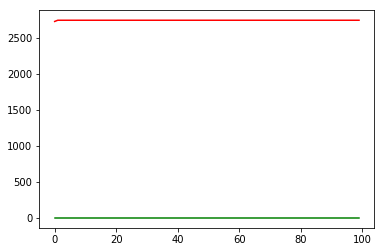

In [22]:
plt.plot(range(len(acc)), acc,'b', label="training accuracy", color='g')
plt.plot(range(len(loss)), loss,'b', label="training loss", color='r')
plt.show()

In [26]:
df_question_tags.head(15)

Id                  Tag
0    1                 data
1    4                   c#
2    4             winforms
3    4      type-conversion
4    4              decimal
5    4              opacity
6    6                 html
7    6                  css
8    6                 css3
9    6  internet-explorer-7
10   8                   c#
11   8      code-generation
12   8                   j#
13   8             visualj#
14   9                   c#

In [24]:
df_questions.head(15)

Id  Score  AnswerCount
0    1      1          0.0
1    4    458         13.0
2    6    207          5.0
3    8     42          8.0
4    9   1410         58.0
5   11   1129         33.0
6   13    451         25.0
7   14    290          8.0
8   16     78          5.0
9   17    114         11.0
10  19    222         21.0
11  23     25          8.0
12  24    100          6.0
13  25     94         10.0
14  34     51          8.0

In [0]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import math

questions = pd.read_csv("Questions.csv", encoding='latin1')
answers = pd.read_csv("Answers.csv", encoding='latin1')
tags = pd.read_csv("Tags.csv", encoding='latin1')

In [0]:
questions = questions.drop(["OwnerUserId","CreationDate","ClosedDate"],axis=1)
answers = answers.drop(["Id","OwnerUserId","CreationDate","Score"],axis=1)

In [0]:
print(questions.head())
print(answers.head())

    Id  Score                                              Title  \
0   80     26  SQLStatement.execute() - multiple queries in o...   
1   90    144  Good branching and merging tutorials for Torto...   
2  120     21                                  ASP.NET Site Maps   
3  180     53                 Function for creating color wheels   
4  260     49  Adding scripting functionality to .NET applica...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...  
2  <p>Has anyone got experience creating <strong>...  
3  <p>This is something I've pseudo-solved many t...  
4  <p>I have a little game written in C#. It uses...  
   ParentId                                               Body
0        90  <p><a href="http://svnbook.red-bean.com/">Vers...
1        80  <p>I wound up using this. It is a kind of a ha...
2       180  <p>I've read somewhere the human eye can't dis...
3       2

In [0]:
f1 = pd.merge(questions, tags, on='Id')

In [0]:
print(f1.head())

   Id  Score                                              Title  \
0  80     26  SQLStatement.execute() - multiple queries in o...   
1  80     26  SQLStatement.execute() - multiple queries in o...   
2  80     26  SQLStatement.execute() - multiple queries in o...   
3  90    144  Good branching and merging tutorials for Torto...   
4  90    144  Good branching and merging tutorials for Torto...   

                                                Body             Tag  
0  <p>I've written a database generation script i...            flex  
1  <p>I've written a database generation script i...  actionscript-3  
2  <p>I've written a database generation script i...             air  
3  <p>Are there any really good tutorials explain...             svn  
4  <p>Are there any really good tutorials explain...     tortoisesvn  


In [0]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
new = f1['Title'].apply(preprocess)


In [0]:
X = new.tolist()
y = f1["Tag"].tolist()

In [0]:
print(y[10])

In [0]:
 from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
vectorizer.fit(X)
vectorizer.transform(X)
#vectorizer.transform(y)
tfidf_vector_X = vectorizer.transform(X).toarray() #shape - (3,6)
tfidf_vector_y = vectorizer.transform(y).toarray() #shape - (3,6)
tfidf_vector_X = tfidf_vector_X[:, :, None] #shape - (3,6,1) since LSTM cells expects ndims = 3
tfidf_vector_y = tfidf_vector_y[:, :, None] #shape - (3,6,1)

In [0]:
import sklearn
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import LSTM

X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_X, tfidf_vector_Y, test_size = 0.2, random_state = 1)

In [0]:
model = Sequential()
model.add(LSTM(units=6, input_shape = X_train[:,:,None], return_sequences = True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=1, return_sequences=True, name='output'))
model.compile(loss='cosine_proximity', optimizer='sgd', metrics = ['accuracy'])

print(model.summary())

model.fit(X_train, y_train, epochs=1, verbose=1)

TypeError: ignored

In [0]:
ans_per_question = collections.Counter(answers['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())
text = "Avegrage number of answers per question ",np.mean(noAnswers)

In [0]:
N=20
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(3,400,"Average answers per question "+str(math.ceil((np.mean(noAnswers)))))

plt.show()

In [0]:
print("Top 2 Questions with maximum number of answers \n")
qid = answerid[:2] 

for b,id in zip(questions['Body'],questions['Id']):
    if id in qid:
        #print(id)
        print(b)
        print("................")

In [0]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

In [0]:
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [0]:
topQuestions =list(zip(questions["Id"],questions["Score"],questions["Title"]))
topQuestions.sort(key=lambda x: x[1],reverse=True)
for id,s,t in topQuestions[:20]:
    #print("Question id:",id)
    print("Score :",s)
    print("Question Title\t:",t,'\n') 

In [0]:
#IDENTIFYING CLUSTERS OF SIMILAR QUESTIONS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from multiprocessing import Pool
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from itertools import chain
from collections import Counter
import pickle
import scipy.io as scio
from sklearn.decomposition import TruncatedSVD
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as hierarchy
from scipy.stats import pearsonr

In [0]:
dat = pd.read_csv("Questions.csv", encoding='latin1')
dat['Title'].fillna("None", inplace=True)
dat['Score'].fillna(0, inplace=True)

In [0]:
selected_ids = np.random.choice(range(dat.shape[0]), 20000, replace=False)
sample = dat.loc[selected_ids, :]
sample.shape

In [0]:
sample.head()


In [0]:
def purify_string(html):
    return re.sub('(\r\n)+|\r+|\n+', " ", re.sub('<[^<]+?>', '', html))


In [0]:
corpus = sample.ix[:, 'Body'].apply(purify_string)


In [0]:
def combine_title_body(tnb):
    return tnb[0] + " " + tnb[1]

In [0]:
p = Pool(8)
combined_corpus = p.map(combine_title_body, zip(dat['Title'], corpus))
p.close()

In [0]:
combined_corpus[:2]


In [0]:
lem = WordNetLemmatizer()
def cond_tokenize(t):
    if t is None:
        return []
    else:
        return [lem.lemmatize(w.lower()) for w in word_tokenize(t)]

p = Pool(8)
tokens = list(p.imap(cond_tokenize, combined_corpus))
p.close()

In [0]:
pure_tokens = [" ".join(sent) for sent in tokens]
print(tokens[0]) # this are the single lemmatized and stemmed tokens
print(pure_tokens[0]) # these are the tokens combined in original form

In [0]:
vectorizer = TfidfVectorizer(min_df=1, max_features=2000, stop_words='english', ngram_range=[1, 1], sublinear_tf=True)
tfidf = vectorizer.fit_transform(pure_tokens) # this is the vector matrix of the tfidf

In [0]:
idfs = pd.DataFrame([[v, k] for k, v in vectorizer.vocabulary_.items()], columns=['id', 'word']).sort_values('id')
idfs['idf'] = vectorizer.idf_

In [0]:
print(idfs.sort_values('idf').head(20))

In [0]:
tsvd = TruncatedSVD(n_components=500) # TODO this n_components=500 is a hyperparameter, look into it
transformed = tsvd.fit_transform(tfidf)

In [0]:
np.sum(tsvd.explained_variance_ratio_)


In [0]:
transformed.shape

In [0]:
D = distance.pdist(transformed, 'cosine')

In [0]:
L = hierarchy.linkage(D)
np.mean(D)

In [0]:
cls = hierarchy.fcluster(L, 0.71, criterion='inconsistent')


In [0]:
df_cls = pd.DataFrame({'Pos': selected_ids, 'Cluster': cls})
cnts = df_cls.groupby('Cluster').size().sort_values(ascending=False)
cnts.sort_values(ascending=False).head()

In [0]:
bc = pd.concat([sample, df_cls.set_index('Pos')], axis=1)
bc.head()

In [0]:
stats = bc.groupby('Cluster')['Score'].describe().unstack()


In [0]:
stats.sort_values(ascending=False).head(10)

In [0]:
plt.figure(figsize=(12, 8))
plt.hlines([0], xmin=0, xmax=np.max(stats['count']) + 5, alpha=0.5)
plt.vlines([1], ymin=0, ymax=np.max(stats['mean']) + 50, alpha=0.5)
plt.scatter(stats['count'], stats['mean'], alpha=0.3)
plt.title("cluster mean score vs cluster size")
plt.xlabel("cluster size")
plt.ylabel("mean score")
plt.show()

In [0]:
bc.loc[bc['Cluster'] == cnts.index[0]][['Score', 'Title', 'Body']]


In [0]:
bc.loc[bc['Cluster'] == cnts.index[1]][['Score', 'Title', 'Body']]


In [0]:
bc.loc[bc['Cluster'] == cnts.index[2]][['Score', 'Title', 'Body']]


In [0]:
import numpy as np
import pandas as pd
import gensim
from bs4 import BeautifulSoup
import nltk
import re

In [0]:
questions_df = pd.read_csv("Questions.csv", encoding='latin1')
tags_df = pd.read_csv("Tags.csv", encoding='latin1')
questions_df.head()

In [0]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from textblob import TextBlob as tb
from sklearn.metrics import jaccard_similarity_score
from html.parser import HTMLParser
import collections
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
dataset_dir = "../content/"
dataset_dir_questions = "Questions.csv"
dataset_dir_answers = "Answers.csv"
dataset_dir_tags = "Tags.csv"
# for offline run
# dataset_dir = "/home/su/Downloads/stacksample"
# list the files in the dataset directory
from subprocess import check_output
print(check_output(["ls", dataset_dir]).decode("utf8"))
cachedStopWords = stopwords.words("english")

In [0]:
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [0]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [0]:
def normalize(str):
    return ' '.join([word for word in re.sub(r'[^\w]', ' ', strip_tags(str)).lower().split() if word not in cachedStopWords and len(word) > 1 and not word.isdigit()])

In [0]:
questions_df = pd.read_csv(dataset_dir+dataset_dir_questions, encoding='latin1').iloc[::10000, :]
answers_df = pd.read_csv(dataset_dir+dataset_dir_answers, encoding='latin1').iloc[::1000, :]
tags_df = pd.read_csv(dataset_dir+dataset_dir_tags, encoding='latin1').iloc[::1000, :]


In [0]:
# Calculate dimensionality
questions_df.shape 
answers_df.shape 
tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10)
answers_df.head(10)
tags_df.head(10) 

In [0]:
# Calculate dimensionality
questions_df.shape 
answers_df.shape 
tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10).loc[:, 'Title':'Body']
answers_df.head(10).loc[:, 'Body':]
tags_df.head(10)

In [0]:
for index, row in questions_df.iterrows():
    questions_df.at[index, 'Body']= normalize(row[6])
    questions_df.at[index, 'Title']= normalize(row[5])
for index, row in answers_df.iterrows():
    answers_df.at[index, 'Body']= normalize(row[5])

In [0]:
# Calculate dimensionality
# questions_df.shape 
# answers_df.shape 
# tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10).loc[:, 'Title':'Body']
# answers_df.head(10).loc[:, 'Body':]
# tags_df.head(10) 

In [0]:
tfidf_dict={}
qID_dict={}
bloblist=[]
idlist=[]

for index, row in questions_df.iterrows():
    # also append title to text body
    bloblist.append(tb(row[6]+" "+row[5]))
    idlist.append(row[0])

for i, blob in enumerate(bloblist):
    if i < 5:
        print("Top words in question ID {}".format(idlist[i]))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        if i < 5:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
            
        # word dict    
        if word in tfidf_dict:
            tfidf_dict[word].append([idlist[i],round(score, 5)])
        else:
            tfidf_dict[word] = [[idlist[i],round(score, 5)]]
        
        # qID dict
        if idlist[i] in qID_dict:
            qID_dict[idlist[i]].append(word)
        else:
            lst=[]
            lst.append(word)
            qID_dict[idlist[i]]=lst

In [0]:
i = 1
for k, v in tfidf_dict.items():
    print(k, v)
    if i == 10:
        break
    i+=1

In [0]:
def predict_duplicate(query):
    
    def top_words(text):
        counts = collections.Counter(text.split())
        return [elem for elem, _ in counts.most_common(5)]

    termList=top_words(query)
    
    for k, v in qID_dict.items():
        if jaccard_similarity_score(termList, qID_dict[k]) >= 0.75:
            print("Duplicate Question. Question exists with qID: " + k)
            return
    
print("Not a Duplicate Question.")

In [0]:
inputQ_title="What is the most efficient way to deep clone an object in JavaScript?"
inputQ_body="""What is the most efficient way to clone a JavaScript object? 
I've seen obj = eval(uneval(o)); being used, 
but that's non-standard and only supported by Firefox.
I've done things like obj = JSON.parse(JSON.stringify(o)); but question the efficiency. 
I've also seen recursive copying functions with various flaws. 
I'm surprised no canonical solution exists."""
inputQ_tags="javascript, json, object"

# normalize
normalized_query=normalize(inputQ_title + " " + inputQ_body+ " " + inputQ_tags)

# predict whether duplicate question
predict_duplicate(normalized_query)

In [0]:
tags_tally = collections.Counter(tags_df['Tag'])

# x = tag name, y = tag frequency
x, y = zip(*tags_tally.most_common(10))

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

area = [i/3 for i in list(y)]   # 0 to 15 point radiuses
plt.figure(figsize=(8,8))
plt.ylabel("Frequency")
plt.title("Top 10 most common tags")
for i in range(len(y)):
        plt.plot(i,y[i], marker='v', linestyle='',ms=area[i],label=x[i])

plt.legend(numpoints=1)
plt.show()

In [0]:
ans_per_question = collections.Counter(answers_df['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())

N=50
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.7)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(10,1.5,"Average answers per question: "+str(math.floor((np.mean(noAnswers)))))

plt.show()

In [0]:
#word2vec embedding
import csv
outputDatafile = open('Tags.csv', 'r')
outputReader = csv.reader(outputDatafile, delimiter=',', quoting=csv.QUOTE_NONE)

print ("OutputReader datatype :",type(outputReader))
inputData= []

for row in outputReader:
    inputData.append(row)
    

    print(inputData)

In [0]:
!NotebookApp.iopub_data_rate_limit=1000000000000000

In [0]:
vocab_size = 10000
data,count, dictinory, reverse_dictionary = collect_data(vocabulary_size=vocab_size)

window_size = 3
vector_dim = 300
epochs = 25

valid_size = 16
valid_window = 100
valid_examples = np.random.choice(valid_window,valid_size,replace=False)

In [0]:
sampling_table = sequence.make_sampling_table(vocab_size)
couples, labels = skipgrams(data, vocab_size, window_size, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target,dtype="int32")
word_context = np.array(word_context,dtype="int32")

print(couples[:10], labels[:10])

In [0]:

import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [0]:
# load ascii text and covert to lowercase
filename = "Tags.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [0]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [0]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("tags Characters: ", n_chars)
print ("tags Vocab: ", n_vocab)

In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("tags Patterns: ", n_patterns)

In [0]:
import csv
import io
import pandas as pd

questions = pd.read_csv("Questions.csv", encoding='latin1')
answers = pd.read_csv("Answers.csv", encoding='latin1')
tags = pd.read_csv("Tags.csv", encoding='latin1')

In [0]:
questions.shape
answers.shape
tags.shape

In [0]:
from collections import Counter
import numpy as np 
import string
import re

In [0]:
def clean_text(text):
    global EMPTY
    EMPTY = ''
    
    if not isinstance(text, str): 
        return text
    text = re.sub('<pre><code>.*?</code></pre>', EMPTY, text)

    def replace_link(match):
        return EMPTY if re.match('[a-z]+://', match.group(1)) else match.group(1)
    
    text = re.sub('<a[^>]+>(.*)</a>', replace_link, text)
    return re.sub('<[^>]+>', EMPTY, text)

In [0]:
questions['Text'] = questions['Body'].apply(clean_text).str.lower()
questions.Text = questions.Text.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [0]:
answers['Text'] = answers['Body'].apply(clean_text).str.lower()
answers.Text = answers.Text.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [0]:
tags['Tag'].nunique()

In [0]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(10,6))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

In [0]:
import collections
import matplotlib.pyplot as plt
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [0]:
tags = tags[(tags.Tag == 'c#') | (tags.Tag == 'java') | (tags.Tag == 'php') | (tags.Tag =='javascript') | (tags.Tag =='jquery') | (tags.Tag == 'android') | (tags.Tag == 'c++') | (tags.Tag == 'iphone') | (tags.Tag == 'python') | (tags.Tag == 'asp.net')]

In [0]:
tags['Tag'].value_counts()

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/stack_over_flow_auto_tagging.ipynb

In [0]:
import pandas as pd
df = pd.read_csv("../content/Questions.csv", encoding="ISO-8859-1")
tags = pd.read_csv("../content/Tags.csv", encoding="ISO-8859-1", dtype={'Tag': str})

In [0]:
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.head(5)

In [0]:
grouped_tags.reset_index()
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final.head(5)


In [0]:
df.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)
df = df.merge(grouped_tags_final, on='Id')
df.head(5)

In [0]:
new_df = df[df['Score']>3]

In [0]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5, 5))
new_df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [0]:
print('Dupplicate entries: {}'.format(new_df.duplicated().sum()))
new_df.drop_duplicates(inplace = True)

In [0]:
new_df.head(5)

In [0]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]
len(all_tags)


In [0]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

In [0]:
import nltk
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [0]:
tags_features

In [0]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [0]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [0]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)
new_df.shape

In [0]:
new_df.dropna(subset=['Tags'], inplace=True)
new_df.shape

In [0]:
from bs4 import BeautifulSoup
import re

new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [0]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer


new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x)) 
token=ToktokTokenizer()


In [0]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [0]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [0]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [0]:
import re
import nltk
nltk.download('stopwords')

new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x)) 
new_df['Body'][2]


In [0]:
from nltk.corpus import stopwords


lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [0]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [0]:
import nltk
nltk.download('wordnet')

new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x)) 

In [0]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x)) 

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

no_topics = 40
text = new_df['Body']
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import numpy as np


TF_IDF_matrix = vectorizer_train.fit_transform(text)
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")

In [0]:
no_top_words = 20
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

X1 = new_df['Body']
X2 = new_df['Title']
y = new_df['Tags']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [0]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

****Model training and testing****

In [0]:
from sklearn.model_selection import train_test_split

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)

#X_tfidf.fit(np.transpose(np.matrix(X1_tfidf)), np.transpose(np.matrix(X2_tfidf)))
X_tfidf = np.stack((np.matrix(X1_tfidf),np.matrix(X2_tfidf)), axis=0)
#X_tfidf.shape
#y_bin.shape
print(X_tfidf.shape,y_bin.shape)
print(X1_tfidf.shape,X2_tfidf.shape)
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [0]:
def avg_jacard(y_true,y_pred):
    
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [0]:
import pickle
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier


dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

In [0]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

In [0]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

In [0]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [0]:
!pip install --upgrade scikit-learn

In [0]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

In [0]:
CV_svc.best_params_

In [0]:
best_model = CV_svc.best_estimator_
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

****Model end****

In [0]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [0]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [0]:
import keras, hyperopt, tensorflow


feature_names = vectorizer_X1.get_feature_names() + vectorizer_X2.get_feature_names()
print_top10(feature_names, best_model, multilabel_binarizer.classes_)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [0]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [0]:
  tag_dtm = vectorizer.fit_transform(tags['tag'])



IndexError: ignored

In [0]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:

questions['Processed Review'] = questions['Title'].apply(preprocess)

questions.head(18)

Id  Score                                              Title  \
0     80     26  SQLStatement.execute() - multiple queries in o...   
1     90    144  Good branching and merging tutorials for Torto...   
2    120     21                                  ASP.NET Site Maps   
3    180     53                 Function for creating color wheels   
4    260     49  Adding scripting functionality to .NET applica...   
5    330     29          Should I use nested classes in this case?   
6    470     13              Homegrown consumption of web services   
7    580     21   Deploying SQL Server Databases from Test to Live   
8    650     79                Automatically update version number   
9    810      9  Visual Studio Setup Project - Per User Registr...   
10   930     28  How do I connect to a database and loop over a...   
11  1010     14  How to get the value of built, encoded ViewState?   
12  1040     42  How do I delete a file which is locked by anot...   
13  1070     17                               Process size on UNIX   
14  1160     36           Use SVN Revision to label build in CCNET   
15  1180     17    How to make subdomain user accounts in a webapp   
16  1300     23  Is nAnt still supported and suitable for .net ...   
17  1390     18  Is Windows Server 2008 "Server Core" appropria...   

                                                 Body  \
0   <p>I've written a database generation script i...   
1   <p>Are there any really good tutorials explain...   
2   <p>Has anyone got experience creating <strong>...   
3   <p>This is something I've pseudo-solved many t...   
4   <p>I have a little game written in C#. It uses...   
5   <p>I am working on a collection of classes use...   
6   <p>I've been writing a few web services for a ...   
7   <p>I wonder how you guys manage deployment of ...   
8   <p>I would like the version property of my app...   
9   <p>I'm trying to maintain a Setup Project in <...   
10  <p>What's the simplest way to connect and quer...   
11  <p>I need to grab the base64-encoded represent...   
12  <p>I'm looking for a way to delete a file whic...   
13  <p>What is the correct way to get the process ...   
14  <p>I am using CCNET on a sample project with S...   
15  <p>I am looking to allow users to control of s...   
16  <p>I am using MSBuild to build my stuff. I wan...   
17  <p>I'm setting up a dedicated SQL Server 2005 ...   

                                     Processed Review  
0   sqlstatement execute multiple query one statement  
1              good branch merge tutorial tortoisesvn  
2                                    asp net site map  
3                         function create color wheel  
4            add script functionality net application  
5                                 use nest class case  
6                   homegrown consumption web service  
7                deploy sql server database test live  
8                 automatically update version number  
9   visual studio setup project per user registry set  
10                  connect database loop recordset c  
11                   get value build encode viewstate  
12                 delete file lock another process c  
13                                  process size unix  
14                 use svn revision label build ccnet  
15                 make subdomain user account webapp  
16                  nant still support suitable net v  
17  window server server core appropriate sql serv...

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(questions['Processed Review'])
idf = vectorizer.idf_
dic = dict(zip(vectorizer.get_feature_names(), idf))
print(dic)
Y = vectorizer.fit_transform(questions['Body'])
Z = vectorizer.fit_transform(questions['Processed Review'],questions['Title'])
A = np.asmatrix(Z)
for i in range(18):
  print(Z[i])
y = A.view()
print(y)
feature_names = vectorizer.get_feature_names()
corpus_index = [n for n in questions]
import pandas as pd
df = pd.DataFrame(index=feature_names, columns=corpus_index)
print(df)
#Y = datax['Processed Review'].tolist()
#Z = datax['Processed Review'].tolist()
#print(Y)
X = questions['Processed Review'].tolist()
Y = questions['Processed Review'].tolist()
from keras import Sequential
from keras.layers import LSTM
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
vectorizer.transform(X)
vectorizer.transform(Y)
tfidf_vector_X = vectorizer.transform(X).toarray() #shape - (3,6)
tfidf_vector_Y = vectorizer.transform(Y).toarray() #shape - (3,6)
tfidf_vector_X = tfidf_vector_X[:, :, None] #shape - (3,6,1) since LSTM cells expects ndims = 3
tfidf_vector_Y = tfidf_vector_Y[:, :, None] #shape - (3,6,1)

X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_X, tfidf_vector_Y, test_size = 0.2, random_state = 1)
model = Sequential()
model.add(LSTM(units=6, input_shape = X_train.shape[1:], return_sequences = True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=1, return_sequences=True, name='output'))
model.compile(loss='cosine_proximity', optimizer='sgd', metrics = ['accuracy'])

print(model.summary())

model.fit(X_train, y_train, epochs=100, verbose=1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  (0, 98234)	0.7403972854309845
  (0, 32759)	0.34151633342722226
  (0, 65190)	0.2669696774955837
  (0, 82313)	0.27453780782769155
  (0, 71344)	0.27795355541816086
  (0, 98993)	0.33358126165947705
  (0, 41816)	0.3713619462235159
  (0, 10943)	0.42006552259255014
  (0, 61672)	0.3826753093113846
  (0, 107401)	0.46160408510271733
  (0, 105873)	0.5710661414285123
  (0, 5771)	0.47711621463328285
  (0, 66996)	0.43322626287932453
  (0, 95406)	0.5849162891271955
  (0, 60043)	0.492491682771692
  (0, 37936)	0.3431760449618338
  (0, 20459)	0.345133432783551
  (0, 16972)	0.4698193474310694
  (0, 115101)	0.7364664938195353
  (0, 66996)	0.3812614448559561
  (0, 1271)	0.36194949547168404
  (0, 90414)	0.4249315486262914
  (0, 37945)	0.6218546599679806
  (0, 4674)	0.395426648384136
  (0, 111191)	0.3008583733873273
  (0, 66966)	0.5745184813821075
  (0, 15368)	0.4391228889796609
  (0, 12891)	0.6217586686868829
  (0, 44834)	0.7404453170587686
  (0, 18885)	0.5293957697907202
  (0, 114307)	0.28777602614044945

Using TensorFlow backend.
